In [6]:
# %%
# standard python imports
import numpy as np
import matplotlib.pyplot as plt

# tidy3d imports
import tidy3d as td
import tidy3d.web as web

In [7]:

# make the geometry object representing the STL solid from the STL file stored on disk
box = td.TriangleMesh.from_stl(
    filename="./box.stl",
    scale=1,  # the units are already microns as desired, but this parameter can be used to change units [default: 1]
    origin=(
        0,
        0,
        0,
    ),  # this can be used to set a custom origin for the stl solid [default: (0, 0, 0)]
    solid_index=None,  # sometimes, there may be more than one solid in the file; use this to select a specific one by index
)

# define material properties of the box
medium = td.Medium(permittivity=2)

# create a structure composed of the geometry and the medium
structure = td.Structure(geometry=box, medium=medium)

# to make sure the simulation runs correctly, let's also make a reference box the usual way
box_ref = td.Box(center=(0, 0, 0), size=(0.8, 1.3, 0.3))

# make the reference structure
structure_ref = td.Structure(geometry=box_ref, medium=medium)

wavelength = 0.3
f0 = td.C_0 / wavelength / np.sqrt(medium.permittivity)

# set the domain size in x, y, and z
domain_size = 2.5

# construct simulation size array
sim_size = (domain_size, domain_size, domain_size)

# Bandwidth in Hz
fwidth = f0 / 40.0

# Gaussian source offset; the source peak is at time t = offset/fwidth
offset = 4.0

# time dependence of sources
source_time = td.GaussianPulse(freq0=f0, fwidth=fwidth, offset=offset)

# Simulation run time past the source decay (around t=2*offset/fwidth)
run_time = 40 / fwidth
# %%
# create a plane wave source
source = td.PlaneWave(
    center=(0, 0, -1),
    source_time=source_time,
    size=(td.inf, td.inf, 0),
    direction="+",
)

# these monitors will be used to plot fields on planes through the middle of the domain in the frequency domain
monitor_xz = td.FieldMonitor(
    center=(0, 0, 0), size=(domain_size, 0, domain_size), freqs=[f0], name="xz"
)
monitor_yz = td.FieldMonitor(
    center=(0, 0, 0), size=(0, domain_size, domain_size), freqs=[f0], name="yz"
)
monitor_xy = td.FieldMonitor(
    center=(0, 0, 0), size=(domain_size, domain_size, 0), freqs=[f0], name="xy"
)

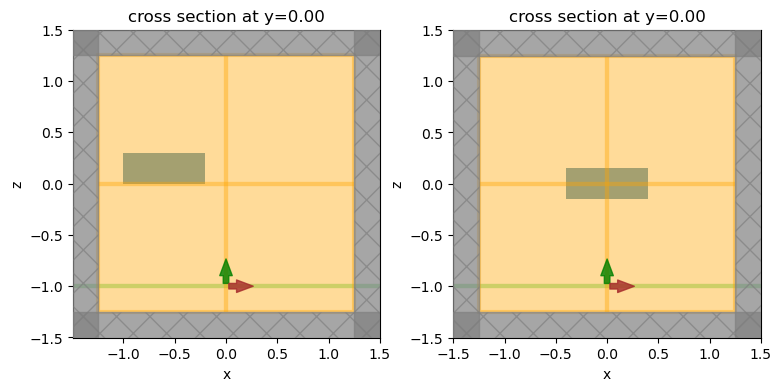

In [3]:
# %%
# STL simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=20),
    sources=[source],
    structures=[structure],
    monitors=[monitor_xz, monitor_yz, monitor_xy],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(td.PML()),
)

# reference simulation
sim_ref = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=20),
    sources=[source],
    structures=[structure_ref],
    monitors=[monitor_xz, monitor_yz, monitor_xy],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(td.PML()),
)

# plot both simulations to make sure everything is set up correctly
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
sim.plot(y=0, ax=ax1)
sim_ref.plot(y=0, ax=ax2)
plt.show()
# %%


In [8]:
monitor_eps_xz = td.PermittivityMonitor(
    center=(0, 0, 0), size=(domain_size, 0, domain_size), freqs=[f0], name="xz_eps"
)

# update the simulation objects to add in the new monitor
sim = sim.copy(update={"monitors": list(sim.monitors) + [monitor_eps_xz]})
sim_ref = sim_ref.copy(update={"monitors": list(sim_ref.monitors) + [monitor_eps_xz]})

In [13]:
# STL simulation
sim_data = web.run(sim, task_name="stl_box", path="data/stl_box.hdf5", verbose=True)

# reference simulation
sim_data_ref = web.run(sim_ref, task_name="stl_box_ref", path="data/stl_box_ref.hdf5", verbose=True)

21:22:42 UTC Created task 'stl_box' with task_id                                
             'fdve-175ae818-abc0-43be-9a2e-e2f6bf56cca7' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=461993;https://tidy3d.simulation.cloud/workbench?taskId=fdve-175ae818-abc0-43be-9a2e-e2f6bf56cca7\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=7719;https://tidy3d.simulation.cloud/workbench?taskId=fdve-175ae818-abc0-43be-9a2e-e2f6bf56cca7\taskId]8;;\]8;id=461993;https://tidy3d.simulation.cloud/workbench?taskId=fdve-175ae818-abc0-43be-9a2e-e2f6bf56cca7\=]8;;\]8;id=23306;https://tidy3d.simulation.cloud/workbench?taskId=fdve-175ae818-abc0-43be-9a2e-e2f6bf56cca7\fdve]8;;\]8;id=461993;https://tidy3d.simulation.cloud/workbench?taskId=fdve-175ae818-abc0-43be-9a2e-e2f6bf56cca7\-175ae818-abc]8;;\
             ]8;id=461993;https://tidy3d.simulation.cloud/workbench?taskId=fdve-175ae818-abc0-43be-9a2e-e2f6bf56cca7\0-43be-9a2e-e2f6bf56cca7']8;;\.

Output()

21:22:44 UTC status = success

Output()

21:22:46 UTC loading simulation from data/stl_box.hdf5

             Created task 'stl_box_ref' with task_id                            
             'fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=394911;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=238678;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\taskId]8;;\]8;id=394911;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\=]8;;\]8;id=506196;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\fdve]8;;\]8;id=394911;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\-7c8b32ba-c1e]8;;\
             ]8;id=394911;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\b-4bc9-8946-962e8e74c7d7']8;;\.

Output()

21:22:48 UTC status = queued

Output()

21:22:53 UTC status = preprocess

21:22:55 UTC Maximum FlexCredit cost: 0.101. Use 'web.real_cost(task_id)' to get
             the billed FlexCredit cost after a simulation run.

             starting up solver

             running solver

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

Output()

21:23:03 UTC early shutoff detected at 4%, exiting.

             status = postprocess

Output()

21:23:08 UTC status = success

             View simulation result at                                          
             ]8;id=827680;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=684514;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\taskId]8;;\]8;id=827680;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\=]8;;\]8;id=323873;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\fdve]8;;\]8;id=827680;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\-7c8b32ba-c1e]8;;\
             ]8;id=827680;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7c8b32ba-c1eb-4bc9-8946-962e8e74c7d7\b-4bc9-8946-962e8e74c7d7']8;;\.

Output()

21:23:09 UTC loading simulation from data/stl_box_ref.hdf5

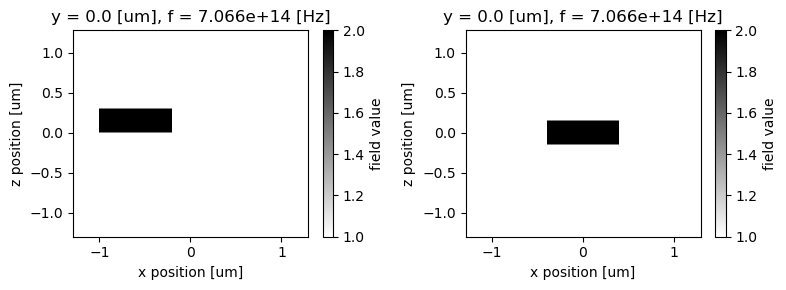

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8, 3))
sim_data["xz_eps"].eps_xx.real.plot(x="x", y="z", ax=ax1, cmap="binary")
sim_data_ref["xz_eps"].eps_xx.real.plot(x="x", y="z", ax=ax2, cmap="binary")
plt.show()

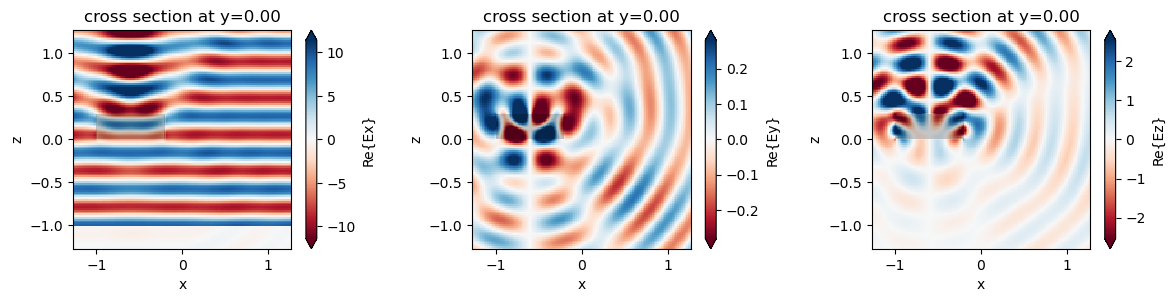

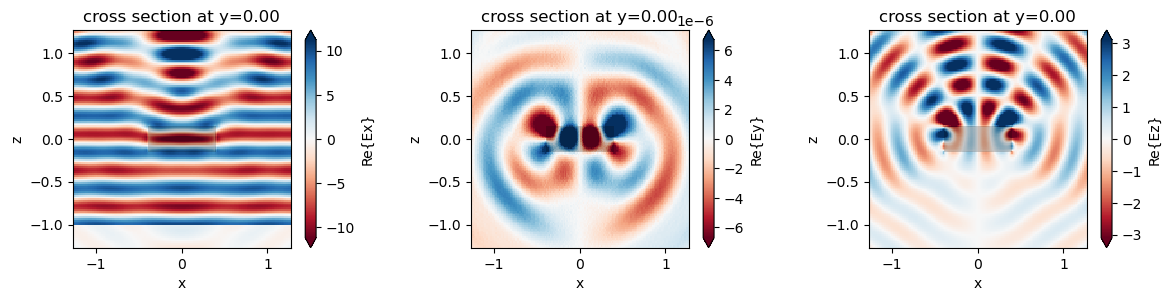

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))
sim_data.plot_field(field_monitor_name="xz", field_name="Ex", y=0, val="real", ax=ax1)
sim_data.plot_field(field_monitor_name="xz", field_name="Ey", y=0, val="real", ax=ax2)
sim_data.plot_field(field_monitor_name="xz", field_name="Ez", y=0, val="real", ax=ax3)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 3))
sim_data_ref.plot_field(
    field_monitor_name="xz", field_name="Ex", y=0, val="real", ax=ax1
)
sim_data_ref.plot_field(
    field_monitor_name="xz", field_name="Ey", y=0, val="real", ax=ax2
)
sim_data_ref.plot_field(
    field_monitor_name="xz", field_name="Ez", y=0, val="real", ax=ax3
)
plt.show()